In [11]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np

In [12]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [13]:
word_idx = imdb.get_word_index()
word_idx = {i: word for word, i in word_idx.items()}
print([word_idx[i] for i in x_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [14]:
print("Max length of a review: ", len(max((x_train+x_test), key=len)))
print("Min length of a review: ", len(min((x_train+x_test), key=len)))

Max length of a review:  2697
Min length of a review:  70


In [15]:
from tensorflow.keras.preprocessing import sequence
# Tüm yorumların sabit uzunluğunu maksimim 400 kelimeye kadar tut
max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)
x_valid, y_valid = x_train[:64], y_train[:64]
x_train, y_train = x_train[64:], y_train[64:]

In [16]:
# her kelimenin yerleştirme boyutunu 32 olacak şekilde sabitle
emb_len = 32
# RNN modeli
RNN_model = Sequential(name= "Simple_RNN")
RNN_model.add(Embedding(vocab_size, emb_len, input_length=max_words))
# Yığılmış (birden fazla RNN katmanı) olması durumunda
# return_sequences=True'u kullanın
RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))
# model özetini yazdır
print(RNN_model.summary())
# modeli derle
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 180737 (706.00 KB)
Trainable params: 180737 (706.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# modelin eğitimi

history = RNN_model.fit(x_train, y_train, 
                        batch_size=64, 
                        epochs=5, 
                        verbose=1, 
                        validation_data=(x_valid,y_valid))
# sonuçların yazdırılması
print()
print("Simple RNN Score :",  RNN_model.evaluate(x_test,y_test, verbose=0))

Epoch 1/5
390/390 [==============================] - 28s 68ms/step - loss: 0.6371 - accuracy: 0.6172 - val_loss: 0.6261 - val_accuracy: 0.7031
Epoch 2/5
390/390 [==============================] - 25s 65ms/step - loss: 0.5610 - accuracy: 0.7071 - val_loss: 0.5217 - val_accuracy: 0.7500
Epoch 3/5
390/390 [==============================] - 21s 55ms/step - loss: 0.4523 - accuracy: 0.7899 - val_loss: 0.5156 - val_accuracy: 0.7656
Epoch 4/5
390/390 [==============================] - 23s 60ms/step - loss: 0.3776 - accuracy: 0.8397 - val_loss: 0.4278 - val_accuracy: 0.8281
Epoch 5/5
390/390 [==============================] - 25s 63ms/step - loss: 0.4024 - accuracy: 0.8250 - val_loss: 0.6035 - val_accuracy: 0.6094
Simple RNN Score : [0.5886204242706299, 0.6729599833488464]


In [18]:
# GRU modeli oluşturulması

gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size, 
                        emb_len, 
                        input_length=max_words))
gru_model.add(GRU(128, activation='tanh', return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))
# modelin özeti
print(gru_model.summary())
#modelin derlemesi
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           160000    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 222337 (868.50 KB)
Trainable params: 222337 (868.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
history2 = gru_model.fit(x_train, y_train, 
                         batch_size=64, 
                         epochs=5, 
                         verbose=1, 
                         validation_data=(x_valid, y_valid))

# sonuçların yazdırılması
print()
print("Simple RNN Score :",  gru_model.evaluate(x_test,y_test, verbose=0))

Epoch 1/5
390/390 [==============================] - 89s 223ms/step - loss: 0.5347 - accuracy: 0.7166 - val_loss: 0.2917 - val_accuracy: 0.9062
Epoch 2/5
390/390 [==============================] - 113s 289ms/step - loss: 0.3163 - accuracy: 0.8691 - val_loss: 0.2574 - val_accuracy: 0.8750
Epoch 3/5
390/390 [==============================] - 105s 270ms/step - loss: 0.2781 - accuracy: 0.8920 - val_loss: 0.2140 - val_accuracy: 0.9219
Epoch 4/5
390/390 [==============================] - 104s 267ms/step - loss: 0.2351 - accuracy: 0.9099 - val_loss: 0.1996 - val_accuracy: 0.9219
Epoch 5/5
390/390 [==============================] - 114s 292ms/step - loss: 0.1997 - accuracy: 0.9248 - val_loss: 0.3692 - val_accuracy: 0.8594
Simple RNN Score : [0.3402905762195587, 0.8753600120544434]


GRU Grafiği


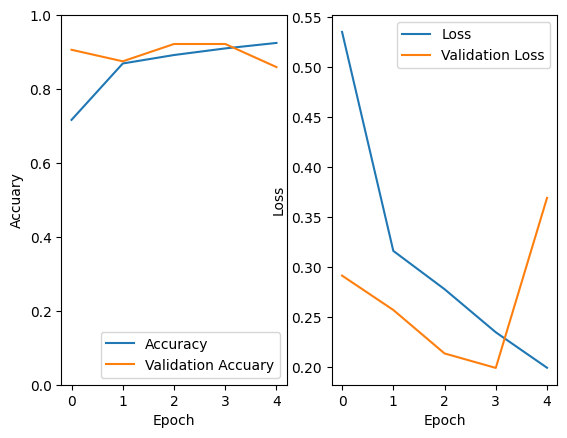

In [29]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuary')
plt.xlabel('Epoch')
plt.ylabel('Accuary')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
print("GRU Grafiği")
plt.show()

RNN Grafiği


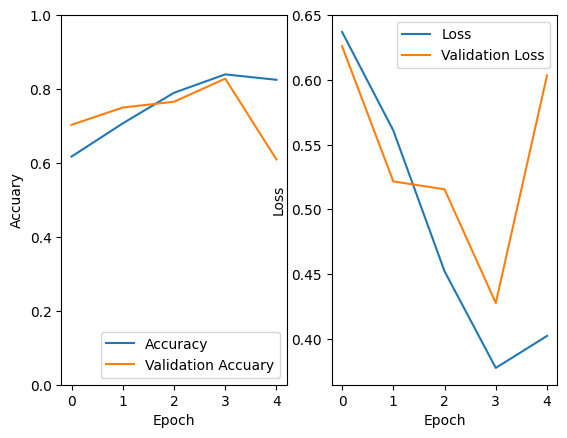

In [28]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuary')
plt.xlabel('Epoch')
plt.ylabel('Accuary')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
print("RNN Grafiği")
plt.show()